# 🧪 Visual Comparisons Across All Time Dilation Models

This notebook provides a comparative exploration of the three models of time dilation simulated:

- **Special Relativity** — High-speed motion  
- **General Relativity** — Gravitational time dilation near a black hole  
- **Relativistic Particle Decay** — Time-dilated lifetimes for subatomic particles

We also include interactive 3D surface visualizations to explore the Δ Time dynamics across different physical domains.


In [20]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## 🔢 Scientific Constants Used
All constants are in SI units unless noted otherwise.

In [27]:
# 🔢 Constants
c = 299_792_458  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
M_sun = 1.98847e30  # Mass of the Sun in kg
R_s = 2 * G * M_sun / c**2  # Schwarzschild radius of the Sun in meters

tau_mu = 2.2e-6  # Proper lifetime of a muon in seconds

| Constant | Symbol | Value | Description |
|----------|--------|--------|-------------|
| Speed of light | `c` | `299,792,458 m/s` | Maximum speed in the universe |
| Gravitational constant | `G` | `6.67430 × 10⁻¹¹ m³/kg/s²` | Describes gravity's strength |
| Solar mass | `M_sun` | `1.98847 × 10³⁰ kg` | Mass of the Sun |
| Schwarzschild radius | `R_s` | `~2.95 km` | Radius of a black hole with solar mass |
| Muon proper lifetime | `τ` | `2.2 µs` | Muon's lifetime in its rest frame |

## 📥 Load the Datasets
We load the three raw datasets and ensure that Δ Time (dilated - proper) is computed.

In [21]:
# Load the datasets
speed_df = pd.read_csv("../data/raw/time_dilation_high_speed_particles.csv")
gravity_df = pd.read_csv("../data/raw/gravitational_time_dilation.csv")
decay_df = pd.read_csv("../data/raw/particle_decay_time_dilation.csv")

# Compute Δ Time if not present
if 'Δ Time (s)' not in speed_df.columns:
    speed_df['Δ Time (s)'] = speed_df['Dilated Time (s)'] - speed_df['Proper Time (s)']
if 'Δ Time (s)' not in gravity_df.columns:
    gravity_df['Δ Time (s)'] = gravity_df['Dilated Time (s)'] - gravity_df['Proper Time (s)']

## 🚀 Δ Time vs Velocity (Special Relativity)
Visualizing how time dilation increases with speed approaching the speed of light.

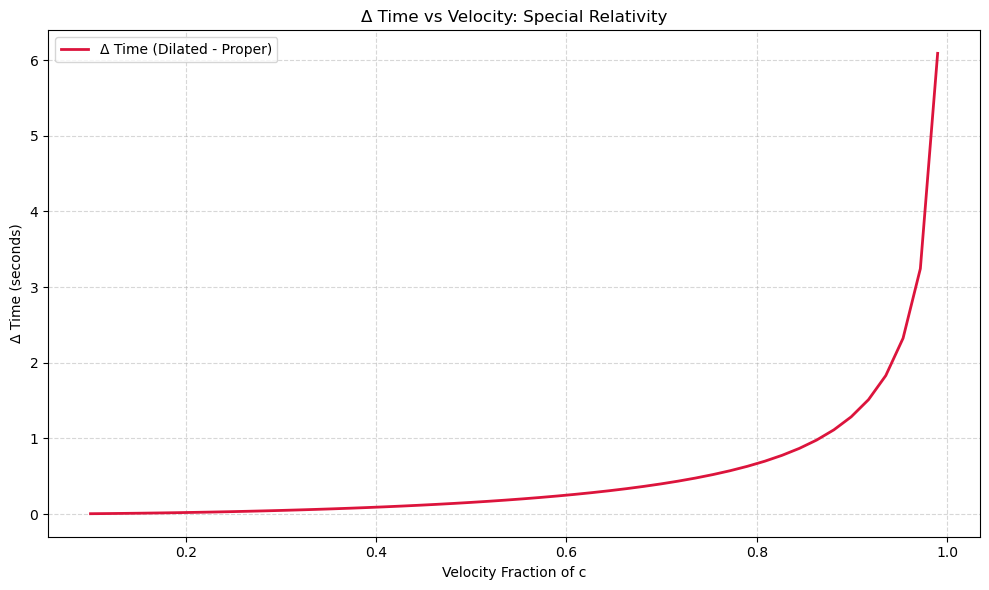

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(
    speed_df['Velocity Fraction of c'],
    speed_df['Δ Time (s)'],
    color='crimson',
    linewidth=2,
    label="Δ Time (Dilated - Proper)"
)

plt.xlabel("Velocity Fraction of c")
plt.ylabel("Δ Time (seconds)")
plt.title("Δ Time vs Velocity: Special Relativity")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## 🌌 Δ Time vs Gravitational Radius (General Relativity)
Visualizing the time gained near intense gravitational fields, such as near black holes.

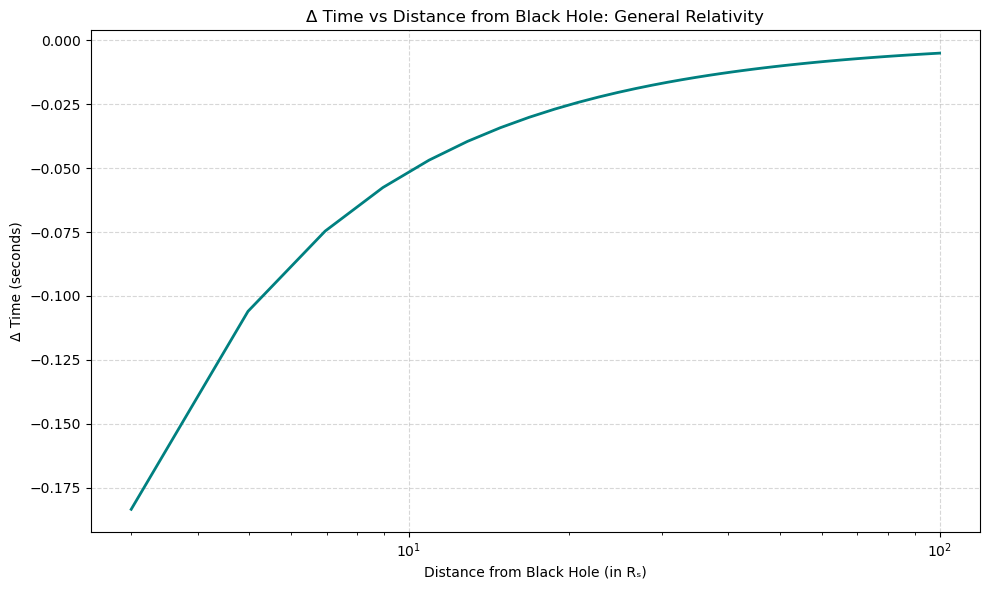

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(
    gravity_df['Distance in Rs'],
    gravity_df['Δ Time (s)'],
    color='teal',
    linewidth=2
)

plt.xlabel("Distance from Black Hole (in Rₛ)")
plt.ylabel("Δ Time (seconds)")
plt.title("Δ Time vs Distance from Black Hole: General Relativity")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 📊 Proper vs Dilated Time Near Black Hole
Compare both the observer and local frame experiences of time.

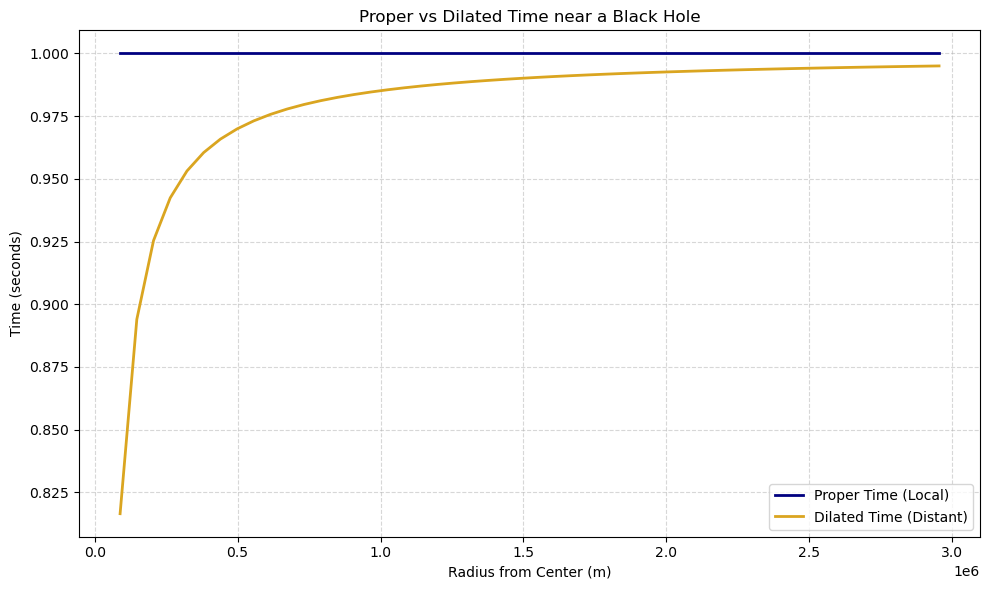

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(gravity_df['Radius from Center (m)'], gravity_df['Proper Time (s)'], label='Proper Time (Local)', color='navy', linewidth=2)
plt.plot(gravity_df['Radius from Center (m)'], gravity_df['Dilated Time (s)'], label='Dilated Time (Distant)', color='goldenrod', linewidth=2)

plt.xlabel("Radius from Center (m)")
plt.ylabel("Time (seconds)")
plt.title("Proper vs Dilated Time near a Black Hole")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 🧬 Particle Decay Distance vs Velocity
Time dilation extends the range that fast-moving particles can travel before decaying.

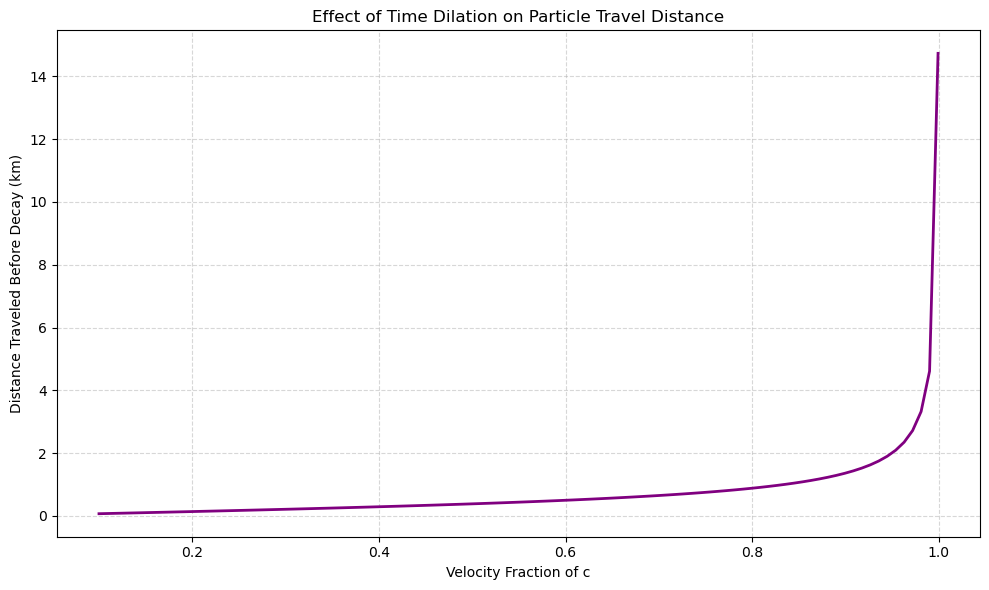

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(
    decay_df["Velocity Fraction of c"],
    decay_df["Distance Traveled (m)"] / 1000,  # Convert meters to kilometers
    color='purple',
    linewidth=2
)

plt.xlabel("Velocity Fraction of c")
plt.ylabel("Distance Traveled Before Decay (km)")
plt.title("Effect of Time Dilation on Particle Travel Distance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 🌐 3D Surface Plot: Δ Time vs Velocity and Lorentz Factor
Explore how time dilation behaves at different velocities and relativistic conditions.

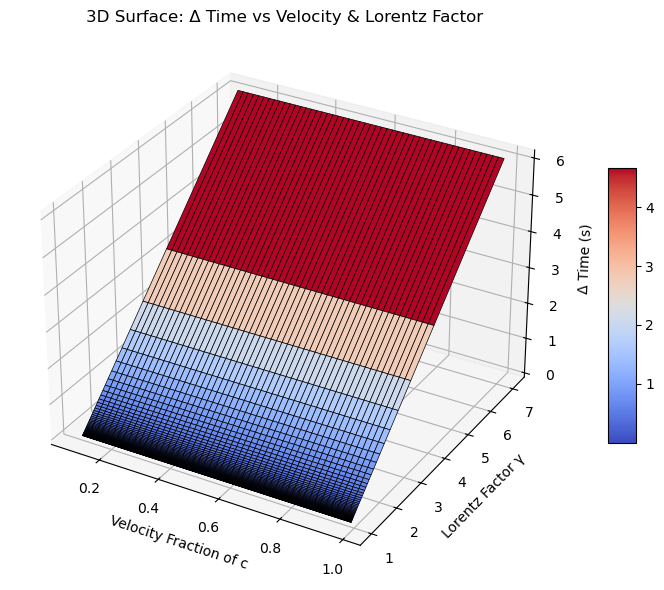

In [26]:
V = speed_df["Velocity Fraction of c"].values
G = speed_df["Lorentz Factor (γ)"].values
Z_speed = np.outer(speed_df["Δ Time (s)"], np.ones_like(speed_df["Δ Time (s)"]))
V_grid, G_grid = np.meshgrid(V, G)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(V_grid, G_grid, Z_speed, cmap=cm.coolwarm, edgecolor='k', linewidth=0.5)

ax.set_title("3D Surface: Δ Time vs Velocity & Lorentz Factor")
ax.set_xlabel("Velocity Fraction of c")
ax.set_ylabel("Lorentz Factor γ")
ax.set_zlabel("Δ Time (s)")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


## ✅ Summary

- **Special Relativity** shows exponential Δ Time increase as velocity nears `c`.
- **General Relativity** predicts extreme dilation near compact objects (e.g., black holes).
- **Muon decay** validates relativistic time extension experimentally.
- **3D plots** provide surface insights into how different parameters influence Δ Time.

📁 This notebook connects and contrasts all three dilation models in one place.
